# **PROBLEM SOLVING DESIGN**

![Lean StartUp Feedback Loop](../img/project_structure/lean_startup_feedback_loop.jpg)

# **BUSINESS CONTEXT**

## **What is the company?**

Hotmart

## **What is its business model?**

Two-sided marketplace. It is a platform for buying, selling and promoting digital products in which Hotmart connects product creators/disseminators to their customers.

## **What is the company stage on the market?**

"Virality" (Lean Analytics) or "early majority" (Innovation Adoption Curve). The company found a pain in the market and validated a product that solves the pain; now is the time to increase the customer base.

# **BUSINESS PROBLEM**

## **What is the business problem the company is facing?**

The company wants to get insight based on customers' data in order to unveil new product opportunities, especially in terms of product success, customer segmentation, and revenue estimation.

## **What is the business solution that this project has to deliver?**

A presentation of storytelling insights based on the available data and, possibly, answers to the following questions:
- Does Hotmart depend on the biggest producers on the platform? That is, the top-selling producers are responsible for most of the
Hotmart billing?
- Are there any relevant patterns or trends in the data?
- It is possible to segment users based on their characteristics (revenue, product niche, etc.)?
- What features most impact the success of a product? that is, the What makes a product sell more?
- It is possible to estimate how much revenue Hotmart will generate in the next three months from the last month shown in the dataset?

**References:**
- Case description
- https://hotmart.com/pt-br

# **SCOPE AND BUSINESS ASSUMPTIONS**

- **...**

- **...**


REFERENCES:
...

# **SOLUTION STRATEGY**

![IoT method](../img/project_structure/iot_method.png)*IOT (Input-Output-Taks) is a planning strategy to structure a problem solution and make sure it delivers a solution that solves the initial problem.*

### INPUT

- **Business context**:
    - It is a platform for buying, selling and promoting digital products in which Hotmart connects product creators/disseminators to their customers.
    - In principle, Hotmart makes money by **taxing**, either the creators or the disseminators, **a percentage of the purchase by the customer**.
- **Business problem**:
    - The company wants to get **insights** based on customers' data in order to **unveil new product opportunities**, especially in terms of product success, customer segmentation, and revenue estimation.
- **Business questions**:
    - Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?
    - Are there any **relevant patterns or trends** in the data?
    - It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?
    - What **features most impact** the success of a **product**? that is, the What makes a **product sell more**?
    - It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
- **Available data**:
    - Data referring to a **sample of purchases made** at Hotmart in 2016. These are more than 1.5 million records of purchases made on our **platform**.

### OUTPUT 

- A presentation of storytelling insights based on the available data and, possibly, answers to the previous questions.

### TASKs

- *QUESTION*:
    - Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?
        - What are the biggest producers on the platform? What is its definition?
            - Assuming higher than 95th percentile of volume of product sold.
        - What it means to be dependent on some producers?
            - Assuming "Pareto rule" like: 80% of revenue comes from the 5th top selling producers
        - What is the revenue difference from this customers to the remaining one?
            - Compare revenues

<br >

- *QUESTION*:
    - Are there any **relevant patterns or trends** in the data?
        - Check for features (correlation between features, feature distributions and time-changes trends) that shows patterns in terms of customers/producers groups or revenue impact or scaling impact.

<br >

- *QUESTION*:
    - It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?
        - What is the purpose of segmenting customers?
          - Find out what are the best customers and what coould be done to change the behaviour of the not-best ones. 
          - Revenue from best customer could support scaling efforts.
        - Check for features that can cluster customer/producers for better revenue undestanding
          - Initially try RFM (Recency-Frequency-Monetary)

<br >      

- *QUESTION*:
    - What **features most impact** the success of a **product**? that is, what makes a **product sell more**?
        - Success of a product = number of products sold
            - Inspect features with high correlation to the number of product sold
            - Inspect feature with high correlation with an increasing trend of products sold
            - Check for simple causal inference techniques
              - knowing features that best impact the product success, we can use this feature for marketing purpose (scalling effort) and, perhaps, get a better overview about what leads to focus on.

<br >

- *QUESTION*:
    - It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
        - Check the revenue time-series to understand how to extrapolate it to the future
            - Visual inspection
            - Check for trend and seasonality and noise
            - Define baseline (dummy = last available date)
                - Initially, ARIMA model
                - If possible, machine learning models
                - Check model error and extrapolate to business impact
                  - knowing revenue forecast we can predcit scaling investments and even prepone investments.

# **PRODUCT BUILDING ROADMAP**

![CRISP-DS Framework](../img/project_structure/crisp_ds.jpg)

---
---
---

# **0 - HELPERS**

## 0.1 - Libraries

*Import required libraries*

In [1]:
# don't cache libraries (especially project library)
%load_ext autoreload
%autoreload 2

In [282]:
# setup and environment
import os
from   pathlib import Path

# data extraction
from sqlalchemy import create_engine

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# project library
from project_lib.initial_config import initial_settings
from project_lib.data_description import (check_dataframe, inspect_dtypes, 
                                          check_na_unique_dtypes, check_dtype_convertion,
                                          summary_statistics, categorical_summary, datetime_summary
                                          )
from project_lib.data_exploration import (numerical_plot, categorical_plot, datetime_plot,
                                          create_cramer_v_dataframe)
from project_lib.ab_testing import check_for_bias

## 0.2 - Functions

*Define functions that will be used on the project*

NOTE: Most functions made for this project are inside the project library. That is, **a package called "project_lib" was created to hold all functions that will be needed for this project.**


For further details, please check the modules inside "project_lib" package [in other words, check .py files inside project_lib folder]

In [3]:
# # example of function created for this project
# help(check_dataframe)

## 0.3 - Setup

*Define basic configurations*

In [4]:
# initial setup of dataframes and plots
initial_settings(storytelling=False)

## 0.4 - Constants

*Define reusuable constants*

In [5]:
# define the project root path that will be the "baseline" for all paths in the notebook
PROJECT_ROOT_PATH = Path.cwd().parent
PROJECT_ROOT_PATH

PosixPath('/home/ds-gustavo-cunha/Projects/hotmart_case')

In [6]:
# # variables to connect to data source
# HOST=os.environ["HOST"]
# PORT=os.environ["PORT"]
# USER=os.environ["USER"]
# PASSWORD=os.environ["PASSWORD"]
# SCHEMA=os.environ["SCHEMA"]
# TABLE=os.environ["TABLE"]

# **1 - DATA EXTRACTION**

## 1.1 - Entity Relationship Diagram

*Display Entity-Relationship Diagram to a better data understanding*

In [7]:
# Not available -> datasets are already merged

## 1.2 - Data Fields Description

*Describe available data in regard to database information*


---

Na Hotmart, possuímos três principais personas que integram nosso negócio: os produtores, os afiliados e os compradores.
- Produtores são pessoas que criam produtos digitais na Hotmart, como cursos de idiomas, ebooks de receitas culinárias, audiolivros, softwares, dentre muitos outros exemplos.
- Afiliados são pessoas que promovem produtos dos produtores em troca de uma comissão na venda, que varia de produto para produto, e de afiliado para afiliado.
- Compradores são pessoas que adquirem um ou mais produtos digitais.
    
Uma venda é feita por um afiliado quando alguém clica em um link de afiliados. Eles geralmente fazem a promoção desses produtos em redes sociais, vídeos, anúncios, etc.

Já uma venda é feita por um produtor quando alguém tem acesso direto ao seu produto, sem intermediação do afiliado. Por exemplo, pessoas que seguem o Whindersson Nunes no Youtube e entraram em seu site oficial para adquirir seu produto, ou clicaram no link do produto sem código de afiliação.

---

---

Durante sua avaliação, você irá analisar dados referentes a uma amostra de compras feitas na Hotmart em 2016. Tratam-se de mais de 1,5 milhão registros de compras realizadas em nossa plataforma. Abaixo, nós iremos detalhar o que significa cada campo:
- **purchase_id**: Identificação da compra na Hotmart;
- **product_id**: Identificação do produto na Hotmart;
- **affiliate_id**: Identificação do afiliado na Hotmart;
- **producer_id**: Identificação do produtor na Hotmart;
- **buyer_id**: Identificação do comprador na Hotmart;
- **purchase_date**: Data e hora em que a compra foi realizada;
- **product_creation_date**: Data e hora em que o produto foi criado na Hotmart;
- **product_category**: categoria do produto na Hotmart. Exemplo: e-book, software, curso online, e-tickets, etc.;
- **product_niche**: nicho de mercado que o produto faz parte. Exemplo: educação, saúde e bem-estar, sexualidade, etc.;
- **purchase_value**: valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a confidencialidade. O valor apresentado no dataset é o z-score do valor real;
- **affiliate_commission_percentual**: percentual de comissão que o afiliado receberá da compra;
- **purchase_device**: tipo de dispositivo utilizado no momento da compra, como: Desktop, Mobile, Tablet, ou Outros;
- **purchase_origin**: endereço do site do qual a pessoa veio antes da compra. Por exemplo, se uma pessoa veio do Facebook, Youtube, ou até mesmo de outra página no site oficial do produto;
- **is_origin_page_social_network**: informa se essa compra veio de uma URL do Facebook, Youtube, Instagram, Pinterest, ou Twitter.

---

---

Algumas regras de negócio:
- Quando a compra for feita diretamente pelo produtor, ou seja, quando não houver afiliado intermediando a compra, o campo affiliate_commission_percentual terá valor 0, e o campo affiliate_id será igual ao producer_id;
- No campo purchase_origin nós apenas consideramos o host do site. Isso quer dizer que, se uma pessoa veio do site www.meuproduto.com/promocoes, esse campo só irá retornar o valor www.meuproduto.com;

---

## 1.3 - Data Loading

*Load data from required files*

In [8]:
# # define connection "endpoint"
# db_connection_str = f'mysql+pymysql://{USER}:{PASSWORD}@{HOST}/{SCHEMA}'
# # create an engine to connect to database
# db_connection = create_engine(db_connection_str)

# # define query to get data
# query=f"""
# SELECT *
# FROM {TABLE}
# """

# # read all data from database
# df_sql = pd.read_sql(sql=query, con=db_connection)
# df_sql

In [9]:
# # save data to parquet so as to not overload database server unnecessarily
# df_sql.to_parquet(
#     path=os.path.join(PROJECT_ROOT_PATH, "data", "raw_data", "customer_data.parquet")
# )

In [10]:
# read data from local source
df_extraction = pd.read_parquet(
    path=os.path.join(PROJECT_ROOT_PATH, "data", "raw_data", "customer_data.parquet")
)

# inspect results
df_extraction.sample(5)

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,Venda
828540,12526603,162518,3457699,3457699,6564010,2016-04-10 19:19:32,2015-07-15 19:23:48,Phisical book,Negotiation,-0.453,0.000,eReaders,Origin 779b,"0,0",1
17907,10875437,180874,2803397,1357847,5932526,2016-01-03 17:28:35,2015-10-20 17:11:22,Phisical book,Media training,-0.401,0.000,eReaders,Origin 1f2c,"0,0",1
29573,10898843,165298,3829799,3829799,5943523,2016-01-05 01:48:23,2015-07-31 17:59:10,Podcast,Negotiation,-0.502,0.000,Desktop,Origin adf0,"0,0",1
52336,10946243,147332,1745680,1745680,4460929,2016-01-08 11:53:17,2015-04-19 16:59:59,Phisical book,Government,-0.447,0.000,eReaders,Origin 64c2,"0,0",1
1151960,13141610,126747,42346,42346,2609525,2016-05-14 12:35:59,2014-12-01 16:42:09,Phisical book,Accounting,-0.448,0.000,Smart TV,Origin ef2b,"0,0",1


# **2 - DATA DESCRIPTION**

## 2.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [11]:
# create a restore point of the previous section
df_description = df_extraction.copy()

# check dataframe for this new section
check_dataframe( dataframe=df_description, summary_stats=True, head=True )

*************************************************
Dataframe size in memory: 660.704 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.828,int64
product_id,0,0,17.883,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.020,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.964,datetime64[ns]
product_creation_date,0,0,17.879,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599828, 15) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,purchase_id,"12.445.456,601","12.468.487,500","917.581,737","1.579.356,500","1.663.958,000","14.357.203,000","12.693.245,000","-0,090","-0,756"
1,product_id,"148.595,814","154.310,000","55.543,152","81.796,000","4,000","319.129,000","319.125,000","-0,482","-0,702"
2,affiliate_id,"2.297.500,688","1.690.428,000","2.092.655,502","3.549.994,000","3,000","7.700.836,000","7.700.833,000","0,651","-0,823"
3,producer_id,"2.164.479,522","1.377.289,000","2.038.959,782","3.366.648,000","3,000","9.868.481,000","9.868.478,000","0,724","-0,699"
4,buyer_id,"5.187.551,341","5.999.153,500","2.199.255,869","3.216.124,250","60,000","12.014.792,000","12.014.732,000","-0,878","-0,492"
5,purchase_value,"0,000","-0,350","1,000","0,518","-0,541","124,561","125,102","10,817","629,206"
6,affiliate_commission_percentual,"7,596","0,000","18,477","0,000","0,000","100,000","100,000","2,259","3,753"
7,Venda,"1,000","1,000","0,000","0,000","1,000","1,000","0,000","0,000","0,000"


-----------------------------


dataframe.head(5)


,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,Venda
0,1663958,6640,209372,116238,1200397,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,-0.3,NaN,Smart TV,Origin ef2b,"0,0",1
1,1677087,2350,141418,2821,1083764,2016-06-26 12:00:00,2010-07-05 01:50:15,Podcast,Child psychology,-0.2,NaN,Smart TV,Origin ef2b,"0,0",1
2,2017360,35669,618642,618642,1436106,2016-06-26 12:00:00,2012-06-13 02:59:37,Podcast,Presentation skills,-0.5,NaN,Smart TV,Origin ef2b,"0,0",1
3,2017379,57998,1164511,70388,1436118,2016-06-26 12:00:00,2013-05-07 08:51:31,Podcast,Anxiety management,-0.4,NaN,Smart TV,Origin ef2b,"0,0",1
4,2017382,58329,1261488,221253,1386357,2016-06-26 12:00:00,2013-05-12 08:12:06,Podcast,Teaching English,-0.5,NaN,Smart TV,Origin ef2b,"0,0",1


*************************************************


## 2.2 - Rename Columns

*Search for misleading or error-prone column names*

In [12]:
# inspect column names
df_description.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'purchase_origin', 'is_origin_page_social_network',
       'Venda'],
      dtype='object')

In [13]:
# lower the case of venda column
df_description = df_description.rename(columns={"Venda": "sell"})

# inspect results
df_description.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'purchase_origin', 'is_origin_page_social_network',
       'sell'],
      dtype='object')

## 2.3 - Check Data Dimensions

*Check dataframe dimensions to know if pandas will be enough to handle such data size or we will need Big Data tools like Spark*

In [14]:
# check number of rows and columns
print( f'\
Dataframe has {df_description.shape[0]:,} \
rows and {df_description.shape[1]} columns' )

Dataframe has 1,599,828 rows and 15 columns


## 2.4 - Data Types

*Check if data types on dataframe makes sense according to database information*

In [15]:
# define shape before dtype convertion
shape_before = df_description.shape

# inspect dataframe types
inspect_dtypes(df_description, 15)

,types,random row: 1,random row: 2,random row: 3,random row: 4,random row: 5,random row: 6,random row: 7,random row: 8,random row: 9,random row: 10,random row: 11,random row: 12,random row: 13,random row: 14,random row: 15
purchase_id,int64,11.802.767,12.614.484,11.337.193,11.723.780,12.894.907,11.941.625,11.067.984,13.923.311,13.687.761,13.925.734,12.814.292,13.249.756,13.282.259,10.921.021,11.267.429
product_id,int64,149.048,202.509,157.881,130.294,193.932,183.336,196.179,107.214,192.588,45.277,219.931,193.258,191.898,186.304,83.377
affiliate_id,int64,4.580.574,4.555.714,584.397,231.479,3.382.787,2.637.904,4.734.645,147.273,147.273,269.291,1.083.123,3.233.583,349.701,122.195,4.372.178
producer_id,int64,4.580.574,4.555.714,584.397,3.992.235,3.382.787,1.853.968,4.734.645,147.273,147.273,269.291,1.083.123,3.233.583,349.701,122.195,2.307.584
buyer_id,int64,5.238.768,5.728.412,6.226.292,5.729.179,7.177.034,6.727.401,1.788.317,7.659.420,7.552.340,7.660.872,2.302.244,7.348.697,5.349.219,2.014.011,6.113.549
purchase_date,datetime64[ns],2016-03-01 07:05:37,2016-04-15 21:23:53,2016-01-31 13:28:18,2016-02-24 19:10:27,2016-05-01 18:12:10,2016-03-08 15:26:09,2016-01-15 20:05:02,2016-06-25 20:46:48,2016-06-12 22:11:30,2016-06-25 23:39:21,2016-04-26 19:57:38,2016-05-19 20:27:35,2016-05-21 21:24:23,2016-01-06 15:35:01,2016-01-27 10:27:12
product_creation_date,datetime64[ns],2015-04-29 22:18:41,2016-02-04 18:35:25,2015-06-20 05:09:49,2014-12-29 12:36:10,2015-12-27 07:36:20,2015-11-03 02:53:47,2016-01-08 18:28:37,2014-06-30 11:19:42,2015-12-18 18:19:41,2012-10-29 11:21:49,2016-04-11 22:18:20,2015-12-21 18:11:30,2015-12-14 16:22:37,2015-11-17 17:32:02,2014-01-24 19:46:59
product_category,object,Phisical book,Phisical book,Phisical book,Phisical book,Podcast,Podcast,Phisical book,Phisical book,Phisical book,Podcast,Podcast,Phisical book,Phisical book,Phisical book,Phisical book
product_niche,object,Negotiation,Accounting,Biology,Immigration,Anxiety management,Anxiety management,Anxiety management,Media training,Presentation skills,Anxiety management,Anxiety management,Negotiation,Anxiety management,Careers,Anxiety management
purchase_value,float64,"-0,523","2,094","-0,355","-0,372","-0,444","-0,358","-0,451","-0,078","2,167","-0,343","-0,472","1,208","0,064","-0,226","-0,359"


In [16]:
# inspect basic column descriptions
check_na_unique_dtypes(df_description);

*************************************************
Dataframe size in memory: 660.704 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.828,int64
product_id,0,0,17.883,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.020,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.964,datetime64[ns]
product_creation_date,0,0,17.879,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599828, 15) 



In [17]:
# print report
print(
    f"Unique values in colum 'sell': {set(df_description['sell'].tolist())}"
)

Unique values in colum 'sell': {1}


In [18]:
# print report
print(
    f"Unique values in colum 'sell': {set(df_description['is_origin_page_social_network'].tolist())}"
)

# convert column is_origin_page_social_network to boolean
df_description["is_origin_page_social_network"] = df_description["is_origin_page_social_network"].apply( lambda x: True if x == '0,0' else False if x == '1,0' else "NaN")

# print report
print(
    f"Unique values in colum 'sell' after transformation: {set(df_description['is_origin_page_social_network'].tolist())}"
)

Unique values in colum 'sell': {'0,0', '1,0'}
Unique values in colum 'sell' after transformation: {False, True}


In [19]:
# sanity check
assert df_description.shape == shape_before, "Data was missed during dtype convertion"

## 2.5 - Data Validation

*Check if columns make sense in regard to business understanding*

In [20]:
# as data was already made available to us 
# and there is no way to validate data source,
# no need for data validation right now.

## 2.6 - Check Duplicated Rows

*Inspect duplicated rows and handle them properly*

In [21]:
# define dataframe grain
grain = ["purchase_id"]

# check duplicated rows
print(
    f'{"*"*49}\n\n'
    f'There are {df_description.duplicated(keep=False).sum():,} '
    f'duplicated rows [{df_description.duplicated(keep=False).mean()*100:.2f}%] based on all columns. '
    f'Duplicated rows are double counted.'
    f'\n\n{"*"*49}\n\n'
    f'Dataframe granularity: {grain}\n\n'
    f'There are {df_description.duplicated(subset=grain, keep=False).sum():,} duplicated rows '
    f'[{df_description.duplicated(subset=grain, keep=False).mean()*100:.2f}%] based on table granularity. '
    f'Duplicated rows are double counted.'
    f'\n\n{"*"*49}'
)

*************************************************

There are 0 duplicated rows [0.00%] based on all columns. Duplicated rows are double counted.

*************************************************

Dataframe granularity: ['purchase_id']

There are 0 duplicated rows [0.00%] based on table granularity. Duplicated rows are double counted.

*************************************************


## 2.7 - Check Missing Values

*Inspect number and percentage of missing value per column to decide what to do with them*

In [22]:
#  get number of NA, percent of NA, number of unique and column type
check_na_unique_dtypes(df_description);

*************************************************
Dataframe size in memory: 566.315 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.828,int64
product_id,0,0,17.883,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.020,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.964,datetime64[ns]
product_creation_date,0,0,17.879,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599828, 15) 



In [23]:
# print report
print(
    f'affiliate_commission_percentual\n'
    f'\tmax value {df_description["affiliate_commission_percentual"].max(skipna=True)}\n'
    f'\tmin value {df_description["affiliate_commission_percentual"].min(skipna=True)}'
)

affiliate_commission_percentual
	max value 100.0
	min value 0.0


## 2.8 - Handle Missing Values

*Handle missing value for columns*

**Business rule**
- Quando a compra for feita diretamente pelo produtor, ou seja, quando não houver afiliado intermediando a compra, o campo affiliate_commission_percentual terá valor 0, e o campo affiliate_id será igual ao producer_id;

In [24]:
# get number of NaN in affiliate_commission_percentual
num_nas = df_description["affiliate_commission_percentual"].isna().sum()

In [25]:
# inspect rows where affiliate_commission_percentual is NaN to validate business rule
df_description.loc[
    df_description["affiliate_commission_percentual"].isna(),
    ["affiliate_commission_percentual", "affiliate_id", "producer_id"]    
].sample(5, random_state=7)

,affiliate_commission_percentual,affiliate_id,producer_id
85,NaN,213339,213339
106,NaN,195000,195000
22,NaN,431496,298517
11,NaN,618642,618642
65,NaN,8716,361052


In [26]:
# as NaNs in affiliate_commission_percentual don't seem to be due to business rule,
# let's fill NaN with -1 (number outside of the scope of min-max range)
df_description["affiliate_commission_percentual"] = df_description["affiliate_commission_percentual"].fillna(value=-1)

# sanity check
assert (df_description["affiliate_commission_percentual"] == -1).sum() == num_nas, "Misleading fillna operation"

## 2.9 - Descriptive Statistics

*Inspect some summary statistics for numerical columns*

In [27]:
# split dataset into types of features
df_number = df_description.select_dtypes(include=["number", "bool"])
df_date = df_description.select_dtypes(include=["datetime"])
df_string = df_description.select_dtypes(include=["object"])

# sanity check
assert df_number.shape[1] + df_date.shape[1] + df_string.shape[1] == df_description.shape[1], """Revise the previous split, something may be wrong!"""

### 2.9.1 - Numerical Variables

*Inspect numerical variables*

In [28]:
# check summary statistics
summary_statistics(df_number)



Statistics for Numerical Variables [NaNs are ignored]:


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,purchase_id,"12.445.456,601","12.468.487,500","917.581,737","1.579.356,500","1.663.958,000","14.357.203,000","12.693.245,000","-0,090","-0,756"
1,product_id,"148.595,814","154.310,000","55.543,152","81.796,000","4,000","319.129,000","319.125,000","-0,482","-0,702"
2,affiliate_id,"2.297.500,688","1.690.428,000","2.092.655,502","3.549.994,000","3,000","7.700.836,000","7.700.833,000","0,651","-0,823"
3,producer_id,"2.164.479,522","1.377.289,000","2.038.959,782","3.366.648,000","3,000","9.868.481,000","9.868.478,000","0,724","-0,699"
4,buyer_id,"5.187.551,341","5.999.153,500","2.199.255,869","3.216.124,250","60,000","12.014.792,000","12.014.732,000","-0,878","-0,492"
5,purchase_value,"0,000","-0,350","1,000","0,518","-0,541","124,561","125,102","10,817","629,206"
6,affiliate_commission_percentual,"7,595","0,000","18,476","0,000","-1,000","100,000","101,000","2,259","3,754"
7,sell,"1,000","1,000","0,000","0,000","1,000","1,000","0,000","0,000","0,000"


According to business rule:
- purchase_value: "valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a  confidencialidade. O valor apresentado no dataset é o **z-score** do valor real";
  - So it is fine to have negative values!

### 2.9.2 - Categorical Variables

*Inspect categorical variables*

In [29]:
# check overview of categorical features
categorical_summary(df_string, nunique_threshold=30, unique_name_len_threshold=50)

Overview of string columns:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_device,0,0,5,object
purchase_origin,0,0,9.603,object


------------------------------------------------- 

---> The unique values for product_category column are: [values are truncated] 

['Video', 'Podcast', 'Phisical book', 'eBook', 'In-class course', 'Workshop', 'Webinar', 'eTicket', 'Subscription', 'App']
------------------------------------------------- 

---> The unique values for product_niche column are: [values are truncated] 

['Presentation skills', 'Child psychology', 'Anxiety management', 'Teaching English', 'Online course creation', 'Media training', 'Storytelling', 'YouTube video creation', 'Procrastination', 'Organization', 'Negotiation', 'Careers', 'Personal finance', 'Filmmaking', 'Government', 'Global diplomacy', 'Immigration', 'Economics', 'Accounting', 'Biology', 'Physics', 'Genetics', 'Disease', 'Thermodynamics', 'Travel hacking']
------------------------------------------------- 

---> The unique values for purchase_device column are: [values are truncated] 

['Smart TV', 'Tablet', 'Desktop', 'eReaders', 'Cellphone']

### 2.9.3 - Datetime Variables

*Inspect datetime variables*

In [30]:
# check an overview of datetime features
datetime_summary(df_date)

,first date,last date,range [months],mean,median,Num NAs,Percent NAs,count [non-NA],nunique
purchase_date,2016-01-01 00:00:27,2016-06-30 23:59:57,6,2016-04-04 18:39:34.511339776,2016-04-07 18:50:16.500000,0,0,1.599.828,1.488.964
product_creation_date,2008-10-27 01:39:34,2016-12-31 13:43:50,99,2015-02-22 14:52:58.141221376,2015-05-31 00:12:18,0,0,1.599.828,17.879


### 2.9.4 - Investigate further:

*Variables to inspect the real meaning*

In [31]:
# None up to this point

# **3 - FEATURE ENGINEERING**

## 3.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [32]:
# create a restore point for the previous section dataframe
df_f_eng = df_description.copy()

# check dataframe
check_dataframe( df_f_eng )

*************************************************
Dataframe size in memory: 566.315 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.828,int64
product_id,0,0,17.883,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.020,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.964,datetime64[ns]
product_creation_date,0,0,17.879,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599828, 15) 

-----------------------------


dataframe.sample(5)


,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,sell
888988,12645378,209464,4658423,4658423,6654591,2016-04-17 13:54:31,2016-03-05 16:47:43,Workshop,Negotiation,0.4,0.0,Desktop,Origin 8447,True,1
550426,11963976,157740,4831032,4831032,5969848,2016-03-09 17:00:44,2015-06-19 16:52:11,Phisical book,Anxiety management,-0.4,0.0,Smart TV,Origin ef2b,True,1
703638,12271646,214529,1095211,1095211,4761985,2016-03-26 22:29:25,2016-03-23 12:44:32,Phisical book,Personal finance,0.1,0.0,eReaders,Origin da12,True,1
199972,11241521,153084,2995498,2995498,6100272,2016-01-25 16:10:24,2015-05-23 22:50:31,Phisical book,Biology,0.0,0.0,eReaders,Origin 76a0,True,1
563980,11992847,143056,349701,349701,5931318,2016-03-11 16:16:00,2015-03-22 20:50:51,Phisical book,Anxiety management,-0.5,0.0,Smart TV,Origin ef2b,True,1


*************************************************


## 3.2 - Hypothesis Testing List

*Define the list of hypotheses that will be validated during Exploratory Data Analysis (EDA)*

**HYPOTHESIS MIND MAP**

![Business hypothesis mindmap](../img/project_structure/xxx.jpg)

*The above image is the product of a brainstorm that took into consideration many different variables that can impact the main business metric. This mind map is a great help when trying to raise hypotheses that could lead to insights. It is also helpful to guide feature engineering (create new relevant features) and when there is a need to look for more data elsewhere.*

> *Taking into consideration hypothesis mind map (at the beginning of this notebook) and the business case questions:*


**H1**. Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?

**H2**. Are there any **relevant patterns or trends** in the data?

**H3**. It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?

**H4**. What **features most impact** the success of a **product**? that is, the What makes a **product sell more**?

**H5**. It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?


## 3.3 - Feature Creation

*Create new features (columns) that can be meaningful for EDA and, especially, machine learning modelling.*

In [33]:
# create a column to indicate what is the age of the product when it was purchased
# purchase_date - product_creation_date in months
# month = 0 ---> purchased on the month of creation
df_f_eng["product_age_when_purchased"] = df_f_eng["purchase_date"].dt.to_period(freq="M") - df_f_eng["product_creation_date"].dt.to_period(freq="M")
# extract the month information
df_f_eng["product_age_when_purchased"] = df_f_eng["product_age_when_purchased"].apply(lambda x: x.n)

# inspect result
df_f_eng[["product_creation_date", "purchase_date", "product_age_when_purchased"]].sample(10, random_state=7)

,product_creation_date,purchase_date,product_age_when_purchased
687286,2015-12-01 12:37:00,2016-03-24 20:01:35,3
307154,2016-01-27 22:56:37,2016-02-08 01:28:05,1
94908,2015-01-10 15:32:09,2016-01-13 13:48:37,12
309710,2013-01-14 13:17:37,2016-02-08 13:19:27,37
1074287,2015-12-27 13:17:06,2016-05-06 12:38:26,5
1398614,2016-04-11 13:35:45,2016-06-09 12:45:41,2
1587844,2015-11-06 23:59:53,2016-06-29 12:32:21,7
1184721,2016-04-14 21:41:31,2016-05-17 02:28:10,1
514906,2016-02-12 14:33:39,2016-03-06 01:52:02,1
810722,2016-02-21 18:28:50,2016-04-09 11:46:53,2


# **4 - DATA FILTERING**

## 4.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [34]:
# create a restore point for the previous section dataframe
df_filter = df_f_eng.copy()

# check dataframe
check_dataframe( df_filter, summary_stats=True )

*************************************************
Dataframe size in memory: 579.113 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.828,int64
product_id,0,0,17.883,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.020,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.964,datetime64[ns]
product_creation_date,0,0,17.879,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599828, 16) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,purchase_id,"12.445.456,601","12.468.487,500","917.581,737","1.579.356,500","1.663.958,000","14.357.203,000","12.693.245,000","-0,090","-0,756"
1,product_id,"148.595,814","154.310,000","55.543,152","81.796,000","4,000","319.129,000","319.125,000","-0,482","-0,702"
2,affiliate_id,"2.297.500,688","1.690.428,000","2.092.655,502","3.549.994,000","3,000","7.700.836,000","7.700.833,000","0,651","-0,823"
3,producer_id,"2.164.479,522","1.377.289,000","2.038.959,782","3.366.648,000","3,000","9.868.481,000","9.868.478,000","0,724","-0,699"
4,buyer_id,"5.187.551,341","5.999.153,500","2.199.255,869","3.216.124,250","60,000","12.014.792,000","12.014.732,000","-0,878","-0,492"
5,purchase_value,"0,000","-0,350","1,000","0,518","-0,541","124,561","125,102","10,817","629,206"
6,affiliate_commission_percentual,"7,595","0,000","18,476","0,000","-1,000","100,000","101,000","2,259","3,754"
7,sell,"1,000","1,000","0,000","0,000","1,000","1,000","0,000","0,000","0,000"
8,product_age_when_purchased,"13,416","10,000","12,933","17,000","-6,000","91,000","97,000","1,277","1,555"


-----------------------------


dataframe.sample(5)


,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,sell,product_age_when_purchased
87229,11014915,192538,367278,367278,5995759,2016-01-12 12:47:11,2015-12-18 15:01:59,Podcast,Negotiation,-0.5,0.0,eReaders,Origin 2f2d,True,1,1
552638,11968376,202509,3670536,4555714,6740184,2016-03-09 21:00:17,2016-02-04 18:35:25,Phisical book,Accounting,2.1,48.0,eReaders,Origin 67a7,True,1,1
69939,10980865,108622,42346,42346,5709199,2016-01-10 11:38:22,2014-07-11 21:33:55,Phisical book,Accounting,0.1,0.0,eReaders,Origin 5187,True,1,18
165692,11171697,82553,4181,36062,2323922,2016-01-22 01:33:36,2014-01-18 10:22:13,Phisical book,Presentation skills,0.3,40.0,Desktop,Origin 7900,True,1,24
1466046,13746847,233730,3247586,3247586,7582497,2016-06-15 19:02:12,2016-06-01 02:48:35,Podcast,Biology,-0.5,0.0,eReaders,Origin 1f1d,True,1,0


*************************************************


## 4.2 Rows Filtering

*Remove rows with meaningless (or unimportant) data*

### purchase_value column

In [35]:
# According to business rule:
# - purchase_value: valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a  confidencialidade. O valor apresentado no dataset é o **z-score** do valor real;
# So it is fine to have negative values! ---> no need to filter rows!

### product_age_when_purchased column

In [36]:
# check negative product_age_when_purchased
df_filter[df_filter["product_age_when_purchased"] < 0]


,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,sell,product_age_when_purchased
1394257,13609042,319129,1738263,9868481,7049073,2016-06-08 19:41:27,2016-12-31 13:43:50,Phisical book,Negotiation,3.4,20.0,Desktop,Origin 5187,True,1,-6
1438238,13692956,319129,599274,9868481,4450488,2016-06-13 05:57:13,2016-12-31 13:43:50,Phisical book,Negotiation,3.5,30.0,Desktop,Origin 6c05,True,1,-6


In [37]:
# define shape before filtering data
shape_before = df_filter.shape

# it order to avoid misleading data (product was sold before being created)
# we will remove these rows
df_filter = df_filter[df_filter["product_age_when_purchased"] >= 0]

# sanity check
assert (
    df_filter.shape[0] == shape_before[0] - 2
) & (
    df_filter.shape[1] == shape_before[1]
), "Misleading rows filtering!"

## 4.3 - Columns Filtering

*Remove auxiliary columns or columns that won't be available in the prediction moment*

### sell column

In [38]:
# TO-DO
# print report
print(
    f"Unique values in colum 'sell': {set(df_filter['sell'].tolist())}"
)

Unique values in colum 'sell': {1}


In [39]:
# define shape before filtering data
shape_before = df_filter.shape

# column sell is a constant column ---> remove it
df_filter = df_filter.drop(columns=["sell"])

# sanity check
# sanity check
assert (
    df_filter.shape[0] == shape_before[0]
) & (
    df_filter.shape[1] == shape_before[1] - 1
), "Misleading columns filtering!"

# **5 - EXPLORATORY DATA ANALYSIS**

## 5.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [40]:
# create a restore point for the previous section dataframe
df_eda = df_filter.copy()

# check dataframe
check_dataframe( df_eda )

*************************************************
Dataframe size in memory: 579.112 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
purchase_id,0,0,1.599.826,int64
product_id,0,0,17.882,int64
affiliate_id,0,0,22.947,int64
producer_id,0,0,8.019,int64
buyer_id,0,0,1.100.649,int64
purchase_date,0,0,1.488.962,datetime64[ns]
product_creation_date,0,0,17.878,datetime64[ns]
product_category,0,0,10,object
product_niche,0,0,25,object
purchase_value,0,0,32.617,float64


-----------------------------

 Dataframe shape is (1599826, 15) 

-----------------------------


dataframe.sample(5)


,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,product_age_when_purchased
1488145,13790660,42903,3361418,442241,2366382,2016-06-18 16:23:44,2012-09-26 15:54:59,Phisical book,YouTube video creation,0.9,0.0,Desktop,Origin b472,True,45
1573975,13959143,215680,1853968,1853968,4420783,2016-06-27 20:59:21,2016-03-27 23:07:39,Podcast,Anxiety management,-0.5,0.0,Desktop,Origin ea2b,True,3
1054180,12959581,113648,54335,54335,7213200,2016-05-04 01:39:56,2014-08-24 13:06:10,Phisical book,Teaching English,0.4,0.0,Desktop,Origin 5187,True,21
949219,12763287,219921,781277,781277,560455,2016-04-24 02:04:25,2016-04-11 21:57:14,Phisical book,Anxiety management,-0.1,0.0,eReaders,Origin 7e2c,True,0
1068279,12985439,105256,658942,658942,841553,2016-05-05 16:01:16,2014-06-17 19:23:03,Phisical book,Anxiety management,-0.4,0.0,Smart TV,Origin ef2b,True,23


*************************************************


## 5.2 - Univariate Analysis

*Explore variables distributions*

In [41]:
# split dataset into types of features
df_eda_num = df_eda.select_dtypes(include=["number", "bool"])
df_eda_date = df_eda.select_dtypes(include=["datetime"])
df_eda_str = df_eda.select_dtypes(include=["object"])

# sanity check
assert df_eda_num.shape[1] + df_eda_date.shape[1] + df_eda_str.shape[1] == df_eda.shape[1], """Revise the previous split, something may be wrong!"""

### 5.2.1 - Numerical Columns

In [42]:
# define categorical figure path
numerical_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "numerical_fatures_eda.png")

# # plot numerical columns for base data
# numerical_plot(
#     dataframe=df_eda_num, 
#     n_cols=3,
#     hist=False,
#     save_fig=numerical_fig_path
#     )

![Numerical Univariate EDA](../img/data_exploration/numerical_fatures_eda.png)

### 5.2.2 - Categorical Columns

In [43]:
# define categorical figure path
categorical_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "categorical_fatures_eda.png")

# # plot categorical columns for base data
# categorical_plot(
#     dataframe=df_eda_str,
#     max_num_cat=10,
#     n_cols=3,
#     trunc_label=20,
#     save_fig=categorical_fig_path
#     )

![Categorical Univariate EDA](../img/data_exploration/categorical_fatures_eda.png)

### 5.2.3 Datetime Columns

In [44]:
# define datetime figure path
datetime_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "datetime_fatures_eda.png")

# # plot datetime columns for base data
# datetime_plot(
#     dataframe=df_eda_date,
#     n_cols=3,
#     save_fig=datetime_fig_path
#     )

![Datetime Univariate EDA](../img/data_exploration/datetime_fatures_eda.png)

## 5.3 - Bivariate Analysis

*Explore relationship between variables (in pairs)*

### 5.3.1 - Numerical variables

In [45]:
# check numerical features
df_eda_num.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_value', 'affiliate_commission_percentual',
       'is_origin_page_social_network', 'product_age_when_purchased'],
      dtype='object')

In [46]:
# define pairplot figure path
pairplot_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "pairplot_eda.png")

# # plot pairplot
# # don't consider id columns -> make no sense as they are "random"
# g = sns.pairplot( df_eda[[
#     'purchase_value', 'affiliate_commission_percentual',
#     'is_origin_page_social_network', 'product_age_when_purchased'
#     ]].sample(100_000), diag_kind="kde", corner=False )
# # define plot details
# for ax in g.axes.flatten():
#     # rotate x axis labels
#     ax.set_xlabel(ax.get_xlabel(), rotation = 45)
#     # rotate y axis labels
#     ax.set_ylabel(ax.get_ylabel(), rotation = 45)
#     # set y labels alignment
#     ax.yaxis.get_label().set_horizontalalignment('right')

# # save figure
# plt.savefig(pairplot_fig_path, facecolor="white", bbox_inches="tight");        

![Pairplot EDA](../img/data_exploration/pairplot_eda.png)

In [47]:
# define pairplot figure path
spearman_corr_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "spearman_corr_eda.png")

# # calculate pearson correlation coefficient
# # don't consider id columns -> make no sense as they are "random"
# correlation = df_eda_num[[
#     'purchase_value', 'affiliate_commission_percentual',
#     'is_origin_page_social_network', 'product_age_when_purchased'
#     ]].corr( method = 'spearman' )

# # display heatmap of correlation on figure
# sns.heatmap( correlation, annot = True, fmt=".2f", cmap="Blues")
# plt.yticks( rotation = 0 )
# # save figure
# plt.savefig(spearman_corr_fig_path, facecolor="white", bbox_inches="tight");

![Spearman Corr EDA](../img/data_exploration/spearman_corr_eda.png)

### 5.3.2 - Categorical variables

In [48]:
# check categorical columns
df_eda_str.columns

Index(['product_category', 'product_niche', 'purchase_device',
       'purchase_origin'],
      dtype='object')

In [49]:
# # create a dataframe with cramer-v for every row-column pair
# cramer_v_corr = create_cramer_v_dataframe( df_eda_str )

# # inspect results
# cramer_v_corr

In [50]:
# # define pairplot figure path
# cramer_corr_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "cramer_corr_eda.png")

# # display heatmap of correlation on figure
# sns.heatmap( cramer_v_corr, annot = True, fmt=".2f", cmap="Blues")
# plt.yticks( rotation = 0 )
# # save figure
# plt.savefig(cramer_corr_fig_path, facecolor="white", bbox_inches="tight");

![Spearman Corr EDA](../img/data_exploration/cramer_corr_eda.png)

### 5.3.3 - Correlation with target variable

In [51]:
# check available columns
df_eda.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'purchase_origin', 'is_origin_page_social_network',
       'product_age_when_purchased'],
      dtype='object')

In [52]:
# # iterate over columns to check for correlation with target variable
# for col in ['purchase_date', 'product_creation_date', 
#             'product_category', 
#             'product_niche', 
#             'affiliate_commission_percentual', 'purchase_device', 
#             'purchase_origin', 'is_origin_page_social_network',
#             'product_age_when_purchased']:
#     # inspect correlation
#     check_for_bias(
#         dataframe=df_eda[[col, 'purchase_value']].sample(100_000),
#         treatment="purchase_value",
#         showfliers=False,
#         figsize=(30, 6),
#         num_cols=3,
#         saving_path=os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", f"{col}_vs_purchase_value_eda.png")
#     );

![Feature vs Target EDA](../img/data_exploration/product_category_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/product_niche_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/purchase_device_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/purchase_origin_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/affiliate_commission_percentual_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/product_age_when_purchased_vs_purchase_value_eda.png)

## 5.4 - Business Hypothesis

*Validate all business hypothesis based on available data*

### **H1.**    - It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
        - Check the revenue time-series to understand how to extrapolate it to the future
            - Visual inspection
            - Check for trend and seasonality and noise
            - Define baseline (dummy = last available date)
                - Initially, ARIMA model
                - If possible, machine learning models
                - Check model error and extrapolate to business impact
                  - knowing revenue forecast we can predcit scaling investments and even prepone investments.

In [65]:
# inspect datetime columns
datetime_summary(df_eda)

,first date,last date,range [months],mean,median,Num NAs,Percent NAs,count [non-NA],nunique
purchase_date,2016-01-01 00:00:27,2016-06-30 23:59:57,6,2016-04-04 18:39:27.246817792,2016-04-07 18:50:10,0,0,1.599.826,1.488.962
product_creation_date,2008-10-27 01:39:34,2016-06-29 17:35:58,93,2015-02-22 14:51:44.914443776,2015-05-31 00:12:18,0,0,1.599.826,17.878


*There are only 6 months of purchase history so it's quite complex to predict future purchases for the next months with such few amount of data (how to extract trend, seasonality and so on?).*

**We will try to use a daily purchase frequency instead to workaround the lack of data in monthly frequency**

In [174]:
# make copy of dataframe
df_hypothesis = df_eda.copy()

# convert purchase_date to daily frequency and keep it as datetime format
df_hypothesis["purchase_date_daily"] = df_hypothesis["purchase_date"].dt.strftime('%Y-%m-%d')
df_hypothesis["purchase_date_daily"] = pd.to_datetime(df_hypothesis["purchase_date_daily"], format='%Y-%m-%d')
# inspect result
df_hypothesis[["purchase_date", "purchase_date_daily"]].sample(10, random_state=7)

,purchase_date,purchase_date_daily
697355,2016-03-26 12:05:07,2016-03-26
130458,2016-01-17 12:27:58,2016-01-17
1529525,2016-06-22 16:47:05,2016-06-22
361887,2016-02-15 20:54:15,2016-02-15
474454,2016-03-01 13:56:20,2016-03-01
1575795,2016-06-28 01:11:08,2016-06-28
784099,2016-04-05 19:41:34,2016-04-05
908334,2016-04-19 14:44:04,2016-04-19
1156550,2016-05-14 17:23:10,2016-05-14
1049816,2016-05-03 18:55:03,2016-05-03


In [176]:
# groupby date and get meaningful agg for each feature
df_daily_purchases_agg = df_hypothesis.groupby(
    by=["purchase_date_daily"], as_index=False).agg(
    sum_purchase_value =("purchase_value", "sum"),
    mean_product_age_when_purchased = ("product_age_when_purchased", "mean"),
    mean_affiliate_commission_percentual = ("affiliate_commission_percentual", "mean"),
    nunique_purchase_id = ("purchase_id", "nunique"),
    nunique_product_id = ("product_id", "nunique"),
    nunique_affiliate_id = ("affiliate_id", "nunique"),
    nunique_buyer_id = ("buyer_id", "nunique"),
    nunique_product_category = ("product_category", "nunique"),
    nunique_product_niche = ("product_niche", "nunique"),
    nunique_purchase_device = ("purchase_device", "nunique"),
    nunique_purchase_origin = ("purchase_origin", "nunique"),
    nunique_is_origin_page_social_network = ("is_origin_page_social_network", "nunique")
)

# define purchase_date_daily as index and set its frequency to daily
df_daily_purchases_agg = df_daily_purchases_agg.set_index("purchase_date_daily").asfreq("D")

# interpolate any missing value on the time series
df_daily_purchases_agg = df_daily_purchases_agg.interpolate(method='linear', axis=0)

# inspect preprocessing
df_daily_purchases_agg.head()

,sum_purchase_value,mean_product_age_when_purchased,mean_affiliate_commission_percentual,nunique_purchase_id,nunique_product_id,nunique_affiliate_id,nunique_buyer_id,nunique_product_category,nunique_product_niche,nunique_purchase_device,nunique_purchase_origin,nunique_is_origin_page_social_network
purchase_date_daily,,,,,,,,,,,,
2016-01-01,"-1,035.5",15.1,8.1,"4,378.0","1,054.0","1,098.0","4,300.0",8.0,23.0,4.0,663.0,2.0
2016-01-02,"-1,401.2",14.5,9.3,"7,909.0","1,591.0","1,613.0","7,746.0",9.0,23.0,5.0,"1,017.0",2.0
2016-01-03,"-1,375.9",14.7,9.6,"8,080.0","1,649.0","1,672.0","7,939.0",10.0,23.0,4.0,"1,052.0",2.0
2016-01-04,"-1,429.3",14.5,8.9,"8,334.0","1,688.0","1,686.0","8,187.0",9.0,23.0,5.0,"1,094.0",2.0
2016-01-05,"-1,317.1",15.1,8.3,"7,938.0","1,614.0","1,640.0","7,795.0",9.0,23.0,5.0,"1,004.0",2.0


*************************************************
	SUM_PURCHASE_VALUE
*************************************************



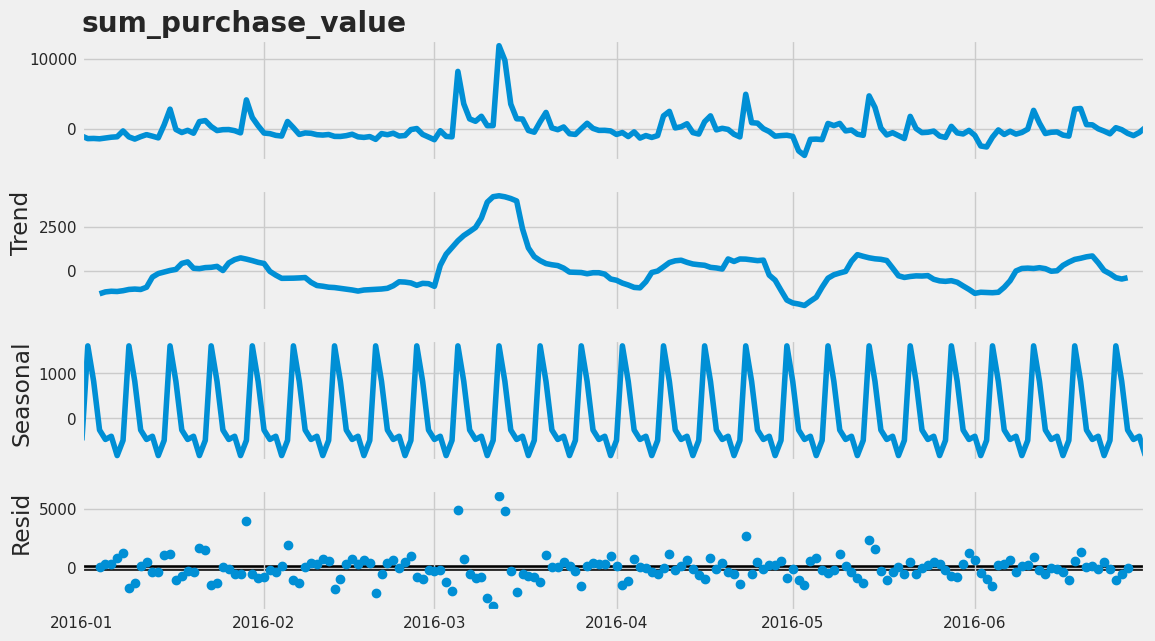

*************************************************
	MEAN_PRODUCT_AGE_WHEN_PURCHASED
*************************************************



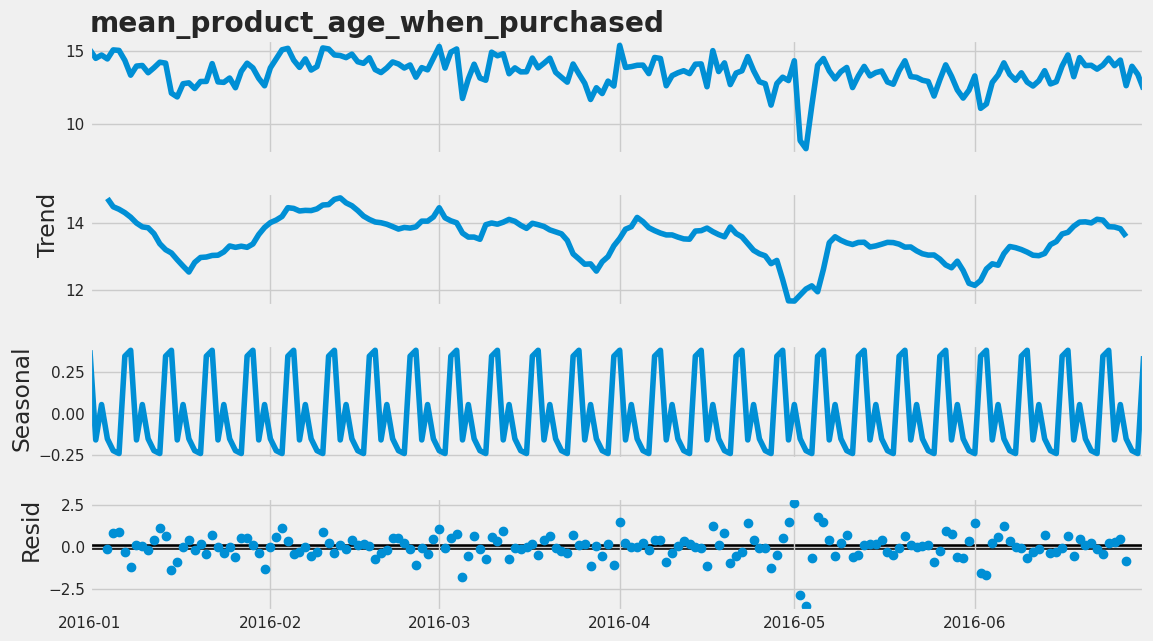

*************************************************
	MEAN_AFFILIATE_COMMISSION_PERCENTUAL
*************************************************



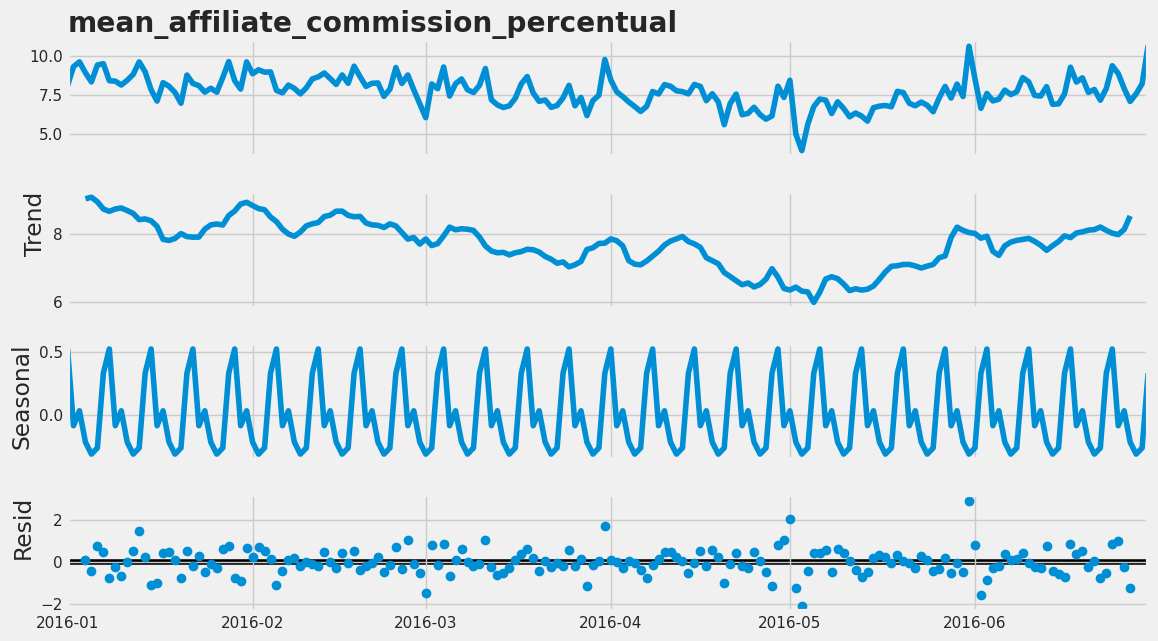

*************************************************
	NUNIQUE_PURCHASE_ID
*************************************************



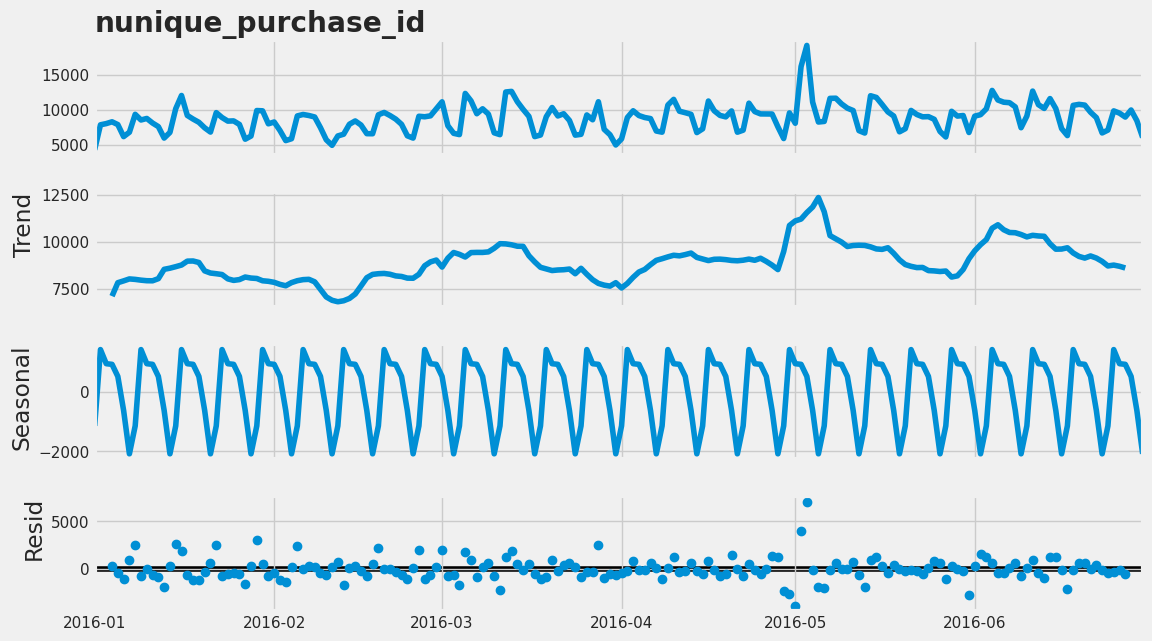

*************************************************
	NUNIQUE_PRODUCT_ID
*************************************************



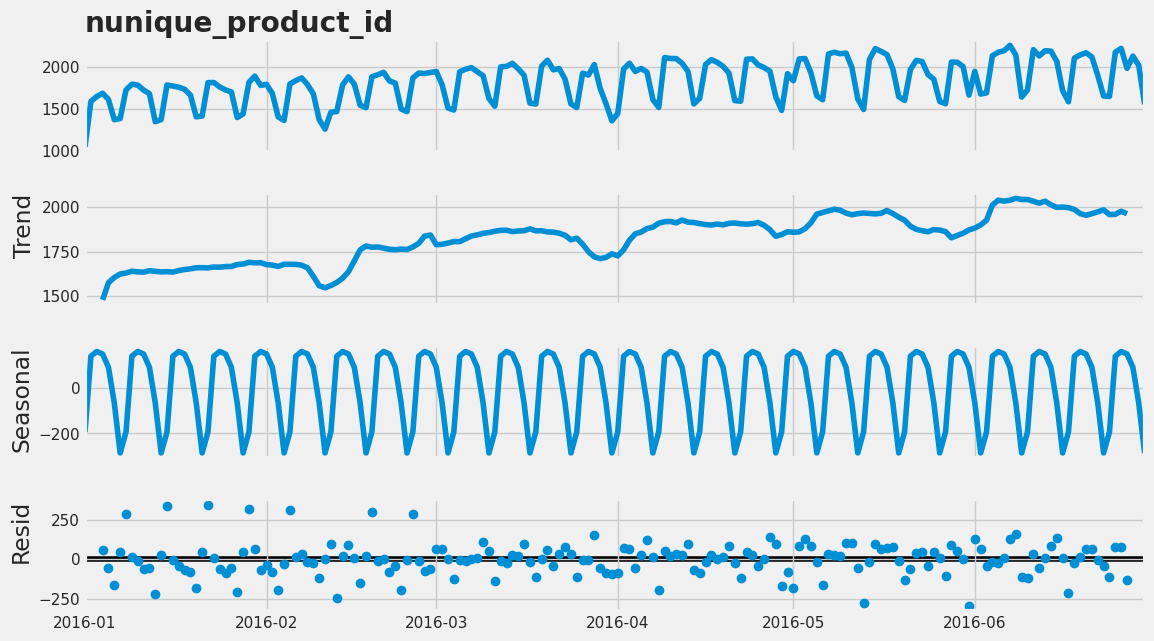

*************************************************
	NUNIQUE_AFFILIATE_ID
*************************************************



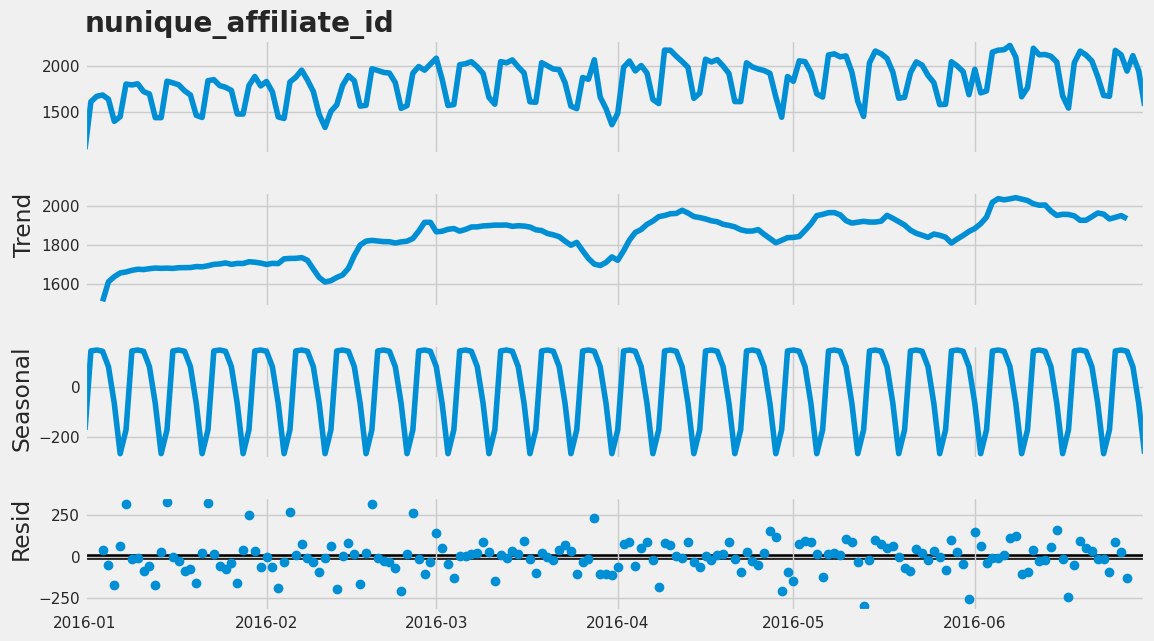

*************************************************
	NUNIQUE_BUYER_ID
*************************************************



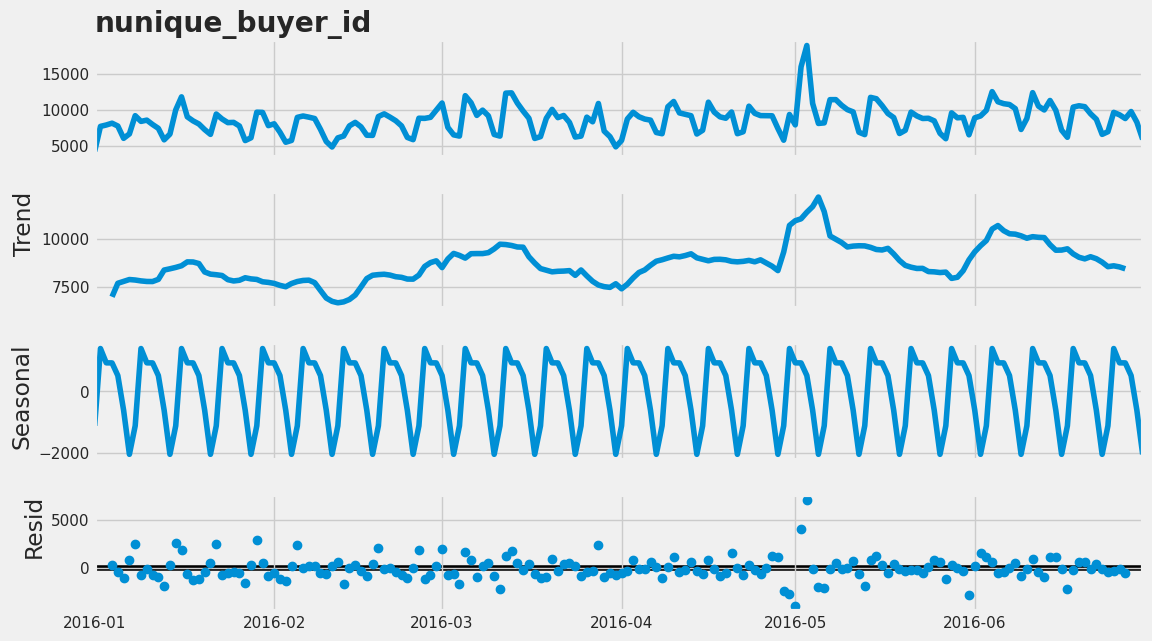

*************************************************
	NUNIQUE_PRODUCT_CATEGORY
*************************************************



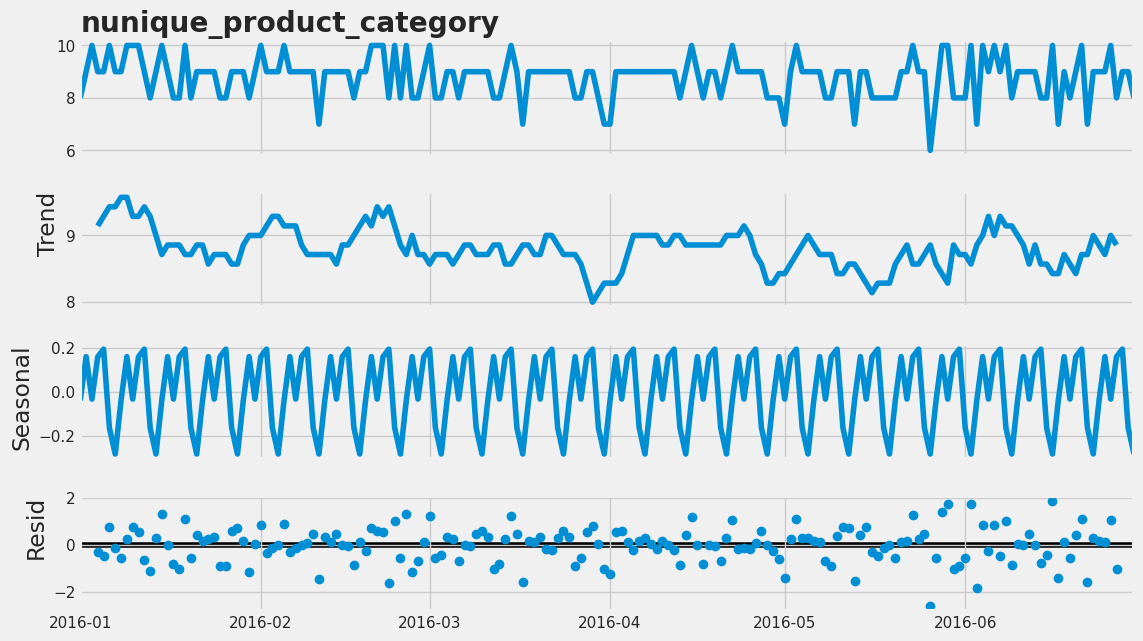

*************************************************
	NUNIQUE_PRODUCT_NICHE
*************************************************



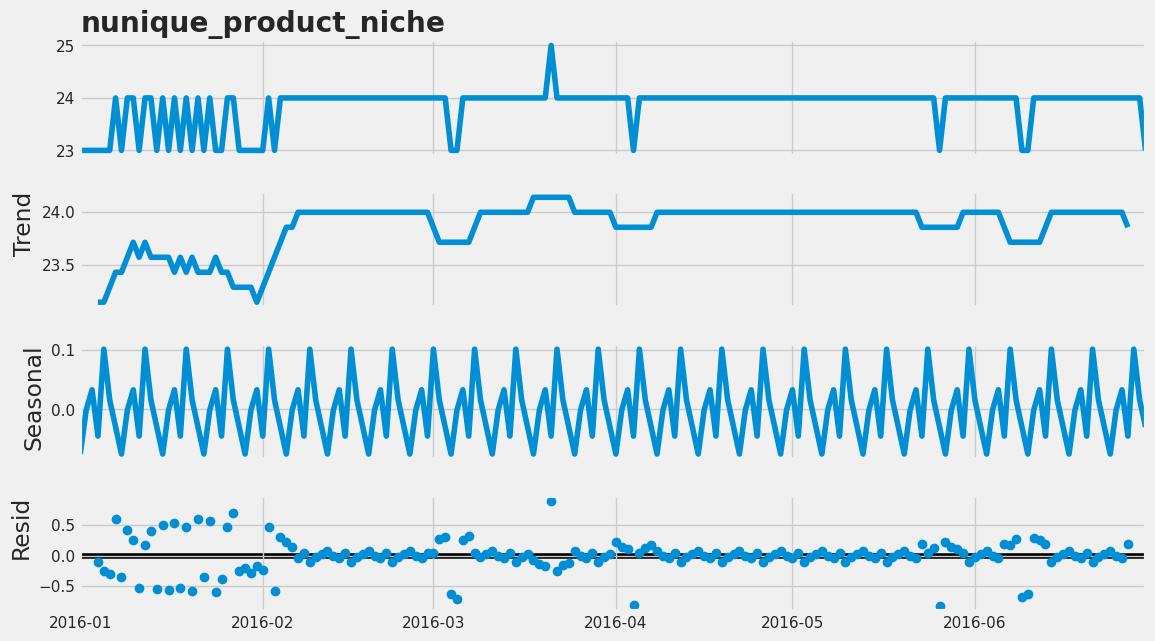

*************************************************
	NUNIQUE_PURCHASE_DEVICE
*************************************************



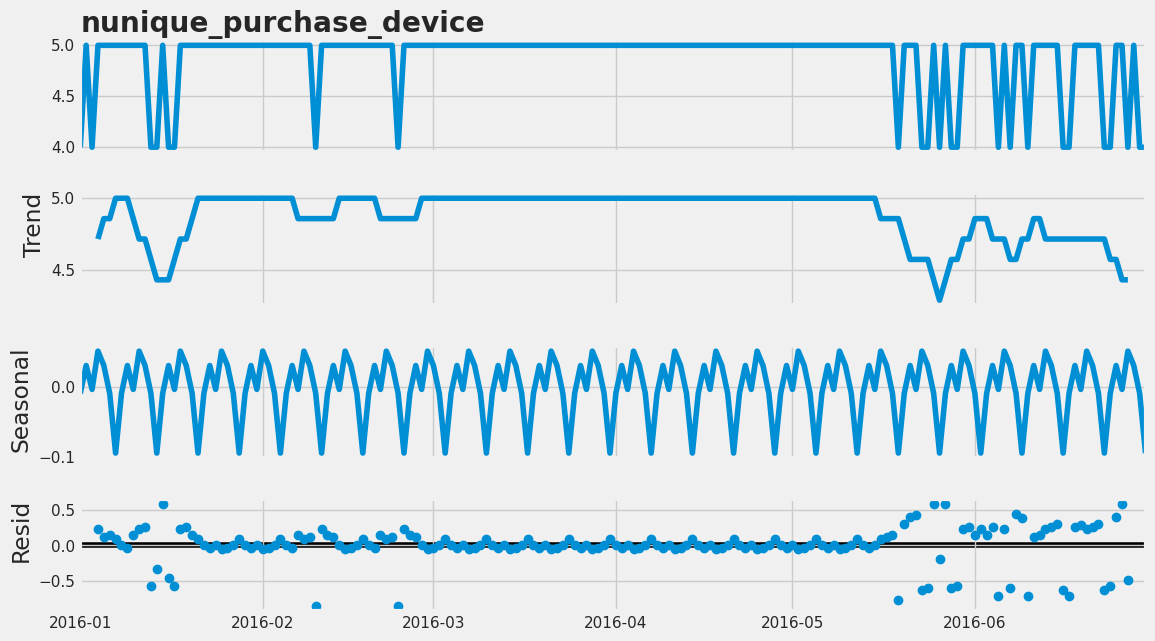

*************************************************
	NUNIQUE_PURCHASE_ORIGIN
*************************************************



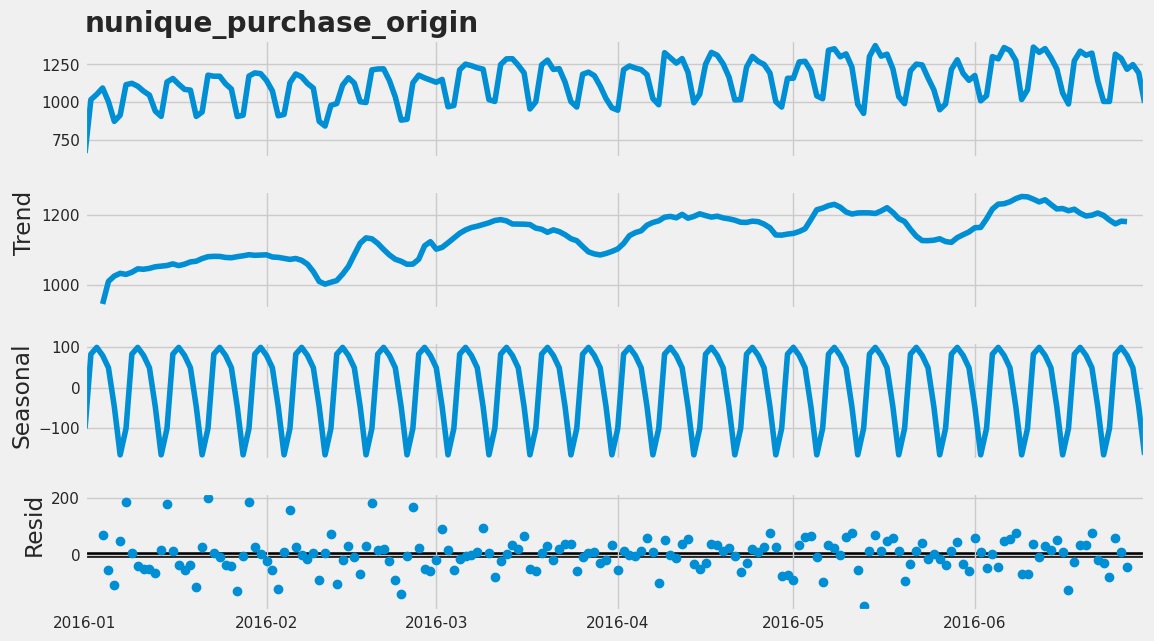

*************************************************
	NUNIQUE_IS_ORIGIN_PAGE_SOCIAL_NETWORK
*************************************************



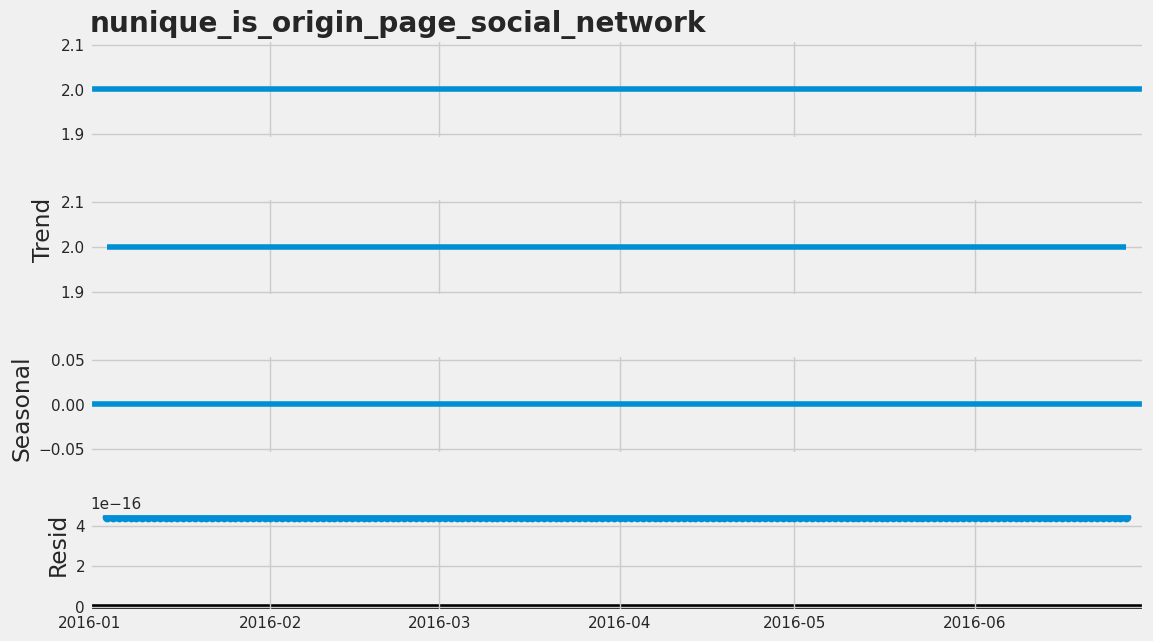

In [211]:
# iterate over columns
for col in df_daily_purchases_agg.columns.tolist():
    # print report
    print(
        f"{'*'*49}\n"
        f"\t{col.upper()}\n"
        f"{'*'*49}\n"
    )
    # plot seasonal decompose
    seasonal_decompose(df_daily_purchases_agg[col], model='additive').plot()
    # plot details
    g = plt.gcf()
    g.set_size_inches(12, 7)
    plt.show()

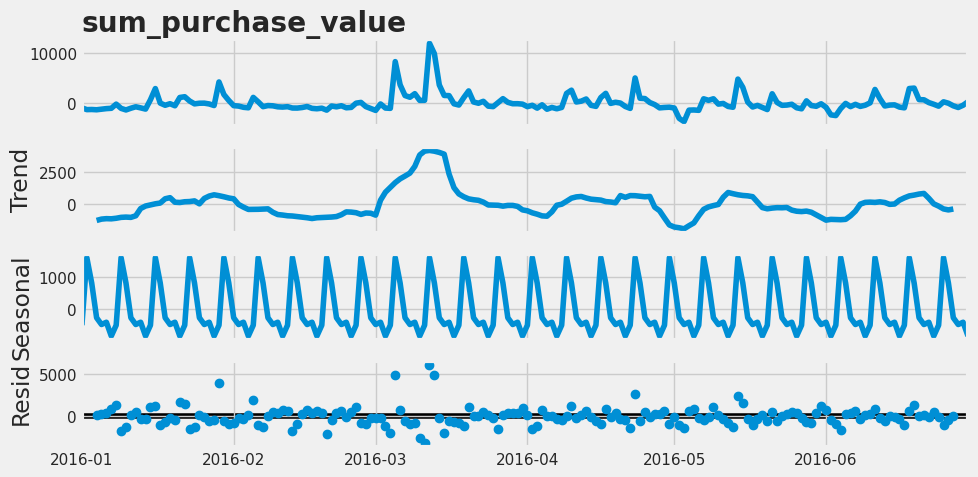

In [226]:
# inspect again target variable
sd = seasonal_decompose(df_daily_purchases_agg["sum_purchase_value"], model='additive')
sd.plot();

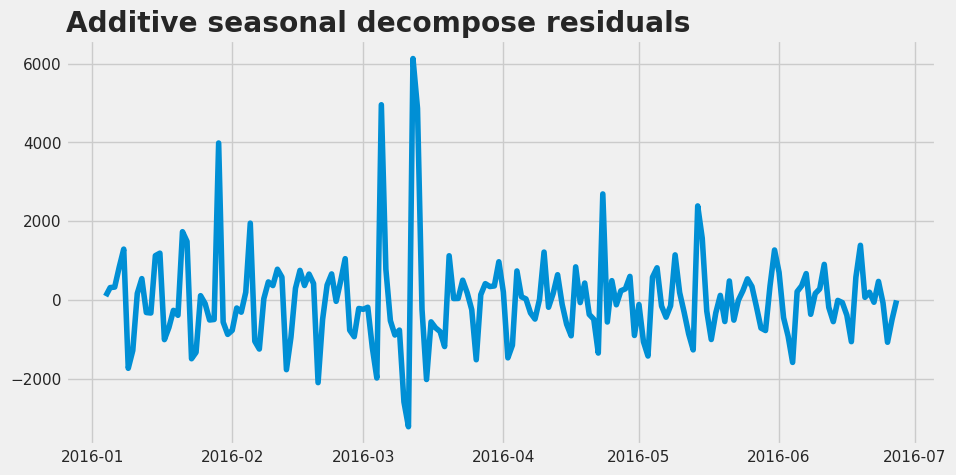

In [232]:
# visually inspect residuals
plt.plot(sd.resid)
plt.title("Additive seasonal decompose residuals");

In [222]:
# perform Augmented Dickey Fuller - ADF to check for stationarity
# H0: The series is not-stationary
adfuller(df_daily_purchases_agg["sum_purchase_value"])[1]  # p-value

0.0056419689735423125

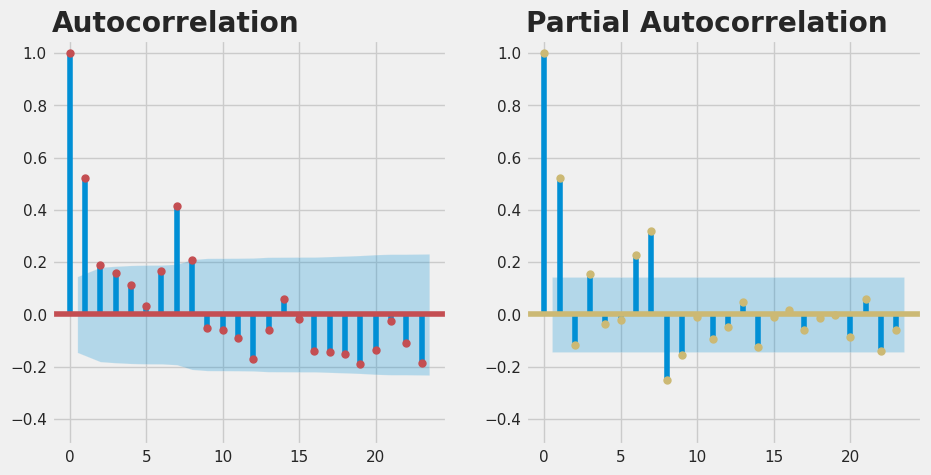

In [241]:
# define figure layout
fig, axs = plt.subplots(nrows=1, ncols=2)
# plot acf and padf
plot_acf(df_daily_purchases_agg["sum_purchase_value"], c="r", zero=True, ax=axs[0])
plot_pacf(df_daily_purchases_agg["sum_purchase_value"], c="y", zero=True, ax=axs[1])
# plot details
axs[0].set_ylim(-0.5, 1.05)
axs[1].set_ylim(-0.5, 1.05)
plt.show()

#### *ARIMA*

In summary, initial guess is:

- **p = 1, q = 2, i = 0**

In [317]:
# define ARIMA model
arima = ARIMA(
    endog=df_daily_purchases_agg["sum_purchase_value"], 
    exog=None, 
    order=(1, 0, 2), 
    seasonal_order=(0, 0, 0, 0), 
    trend=None, 
    enforce_stationarity=True, 
)    

# fit model to data
arima = arima.fit()
# check results
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:               sum_purchase_value   No. Observations:                  182
Model:             ARIMA(1, 0, 2)x(0, 2, [], 7)   Log Likelihood               -1561.362
Date:                          Sun, 21 May 2023   AIC                           3130.723
Time:                                  00:31:39   BIC                           3143.219
Sample:                              01-01-2016   HQIC                          3135.795
                                   - 06-30-2016                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5639      0.370      1.522      0.128      -0.162       1.290
ma.L1         -0.0303      0.392     -0.077      0.938      -0.799       0.739
ma.L2          0.0114      0.222      0.052      0.959      -0.424       0.447
sigma2      7.118e+06   4.26e+05     16.708      0.000    6.28e+06    7.95e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               255.93
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.72
Prob(H) (two-sided):                  0.54   Kurtosis:                         8.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

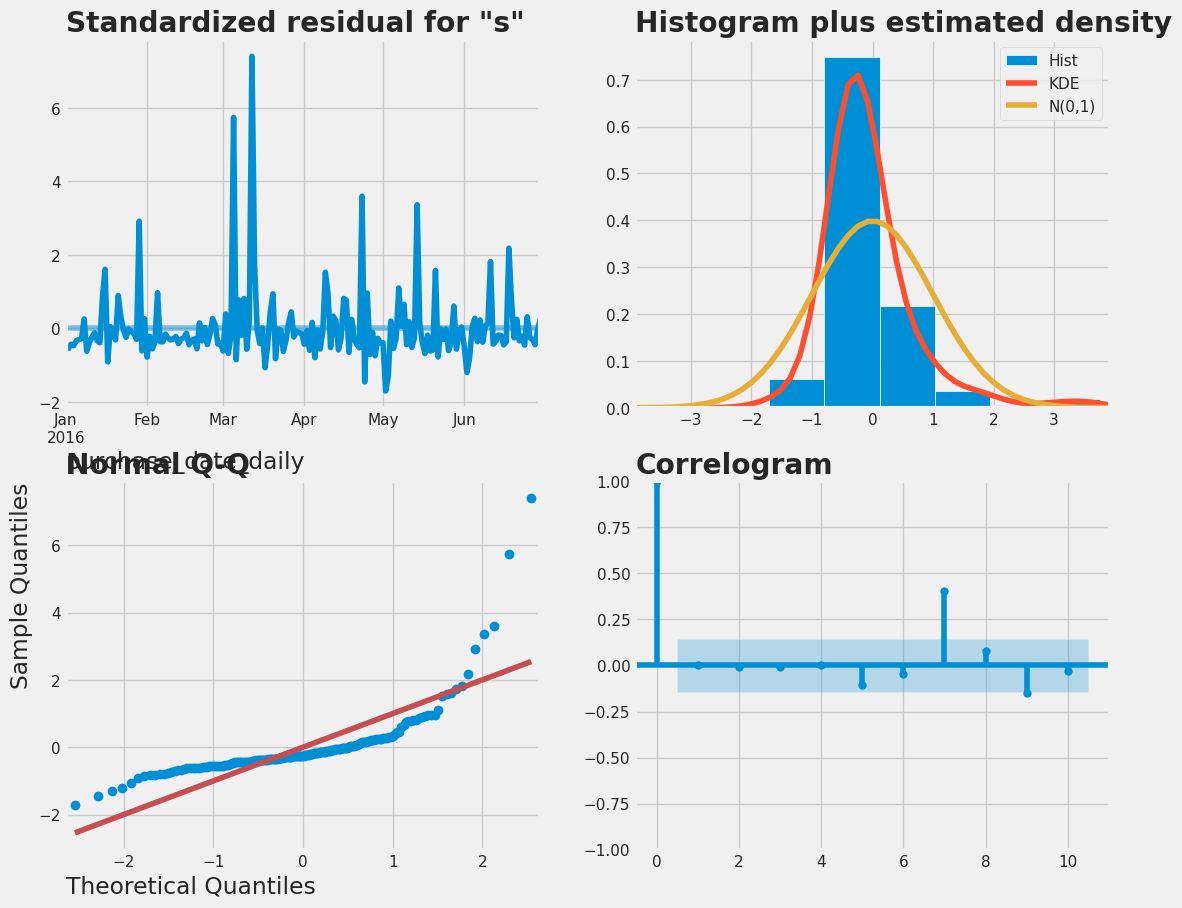

In [316]:
# perform error analysis
arima.plot_diagnostics(figsize=(12,10))
plt.show()

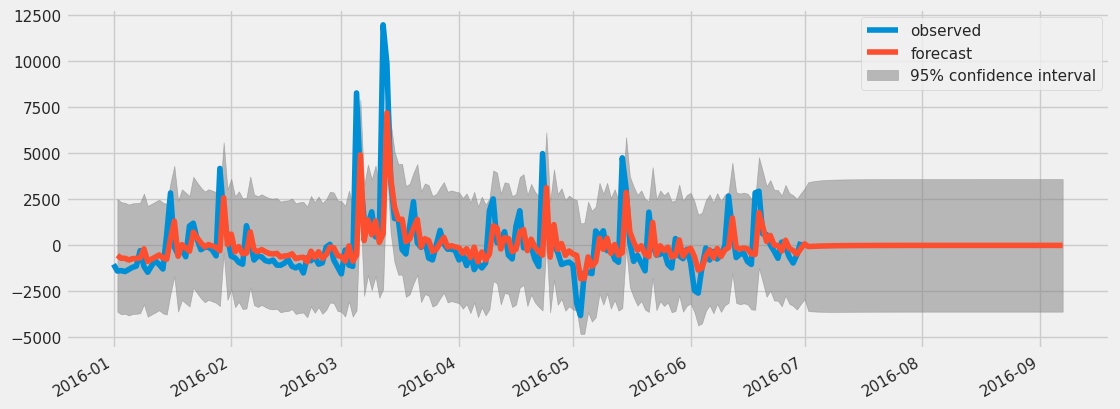

In [261]:
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
axs.plot(df_daily_purchases_agg["sum_purchase_value"], label='observed')
plot_predict(arima, start=1, end=250, ax=axs);

#### *Auto-ARIMA*

In [318]:
# Define Auto-ARIMA to automatically discover the optimal order for an ARIMA model.
auto_model = pm.auto_arima(df_daily_purchases_agg["sum_purchase_value"],
                       start_p=0, max_p=2,
                       d=0, max_d=1,
                       start_q=1, max_q=2,
                       max_order=5, 
                       trend=None, seasonal=True, with_intercept="auto",
                       out_of_sample_size=7, scoring="mse",
                       trace=True, error_action="ignore", suppress_warnings=True, 
                       n_jobs=-1
                       )

# fit mode to data
auto_model.fit()

/home/ds-gustavo-cunha/.pyenv/versions/hotmart_case/lib/python3.10/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3199.967, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3256.625, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3200.802, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3254.627, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3198.333, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3198.617, Time=0.73 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3198.008, Time=0.92 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3199.542, Time=0.21 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3199.223, Time=1.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3194.992, Time=0.83 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3197.512, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3196.313, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3197.525, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3197.950, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]          

TypeError: ARIMA.fit() missing 1 required positional argument: 'y'

In [319]:
# inspect results
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  182
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1593.496
Date:                Sun, 21 May 2023   AIC                           3194.992
Time:                        00:32:41   BIC                           3207.808
Sample:                             0   HQIC                          3200.187
                                - 182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8420      0.183      4.604      0.000       0.484       1.201
ma.L1         -0.2446      0.212     -1.154      0.249      -0.660       0.171
ma.L2         -0.3526      0.212     -1.666      0.096      -0.767       0.062
sigma2      2.435e+06   1.04e+05     23.349      0.000    2.23e+06    2.64e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4131.82
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                             3.96
Prob(H) (two-sided):                  0.03   Kurtosis:                        24.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### *Profet*

In [279]:
# define model dataset
df_modelling = df_daily_purchases_agg["sum_purchase_value"]
# set index as ds column
df_modelling = df_modelling.reset_index().rename(columns={"purchase_date_daily": "ds", "sum_purchase_value": "y"})

# define training ratio and split index
tr = 0.75
split_index = int(len(df_modelling)*0.7)
split_index = -30

# split dataset
train = df_modelling.iloc[:split_index]
test = df_modelling.iloc[split_index:]

# instanciate model
model = Prophet(seasonality_mode='additive')

# fit model to data
model.fit(train)

23:57:43 - cmdstanpy - INFO - Chain [1] start processing
23:57:43 - cmdstanpy - INFO - Chain [1] done processing


In [280]:
# make forecasts for testing data
test_forecast = model.predict(test)
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01,115.8,"-2,628.2","1,980.1",115.8,115.8,-370.9,-370.9,-370.9,-370.9,-370.9,-370.9,0.0,0.0,0.0,-255.1
1,2016-06-02,115.6,"-2,806.3","1,470.9",115.5,115.7,-777.1,-777.1,-777.1,-777.1,-777.1,-777.1,0.0,0.0,0.0,-661.4
2,2016-06-03,115.5,"-2,561.8","2,026.9",115.2,115.7,-379.3,-379.3,-379.3,-379.3,-379.3,-379.3,0.0,0.0,0.0,-263.8
3,2016-06-04,115.3,-599.5,"3,980.9",114.8,115.8,"1,586.4","1,586.4","1,586.4","1,586.4","1,586.4","1,586.4",0.0,0.0,0.0,"1,701.7"
4,2016-06-05,115.1,"-1,289.6","3,087.0",114.3,115.9,736.6,736.6,736.6,736.6,736.6,736.6,0.0,0.0,0.0,851.7


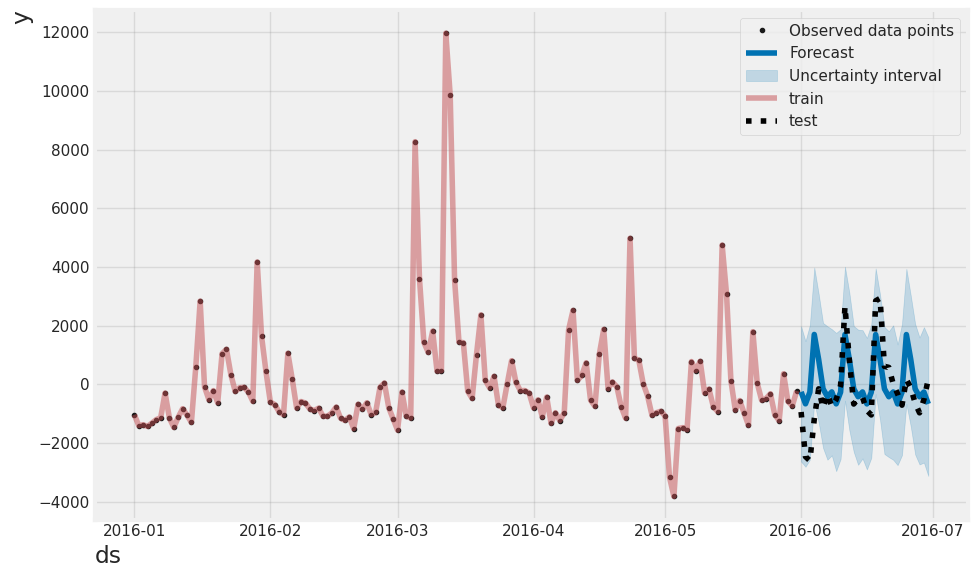

In [310]:
# plot forecast
model.plot(test_forecast);
plt.plot(train["ds"], train["y"], label="train", color="r", alpha=0.5)
plt.plot(test["ds"], test["y"], label="test", color="black", linestyle="dotted")
plt.legend()
plt.show()

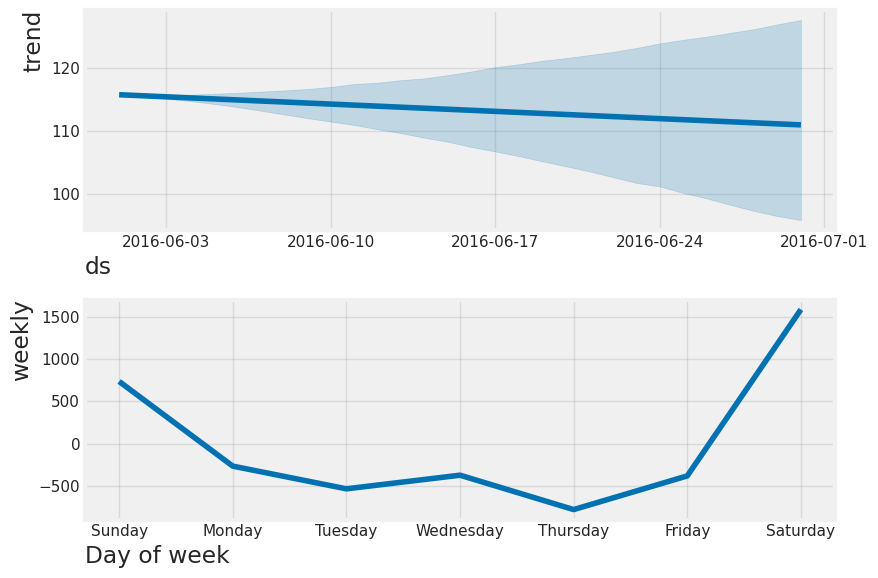

In [285]:
# plot prediction components
model.plot_components(test_forecast);

In [287]:
# cross-validate model
df_cv = cross_validation(
    model=model, 
    initial = "30 days", # size of the initial training period
    period = "15 days", # spacing between cutoff dates
    horizon = "30 days", # forecast horizon  
    )

# inspect results
df_cv

  0%|          | 0/7 [00:00<?, ?it/s]00:06:21 - cmdstanpy - INFO - Chain [1] start processing
00:06:22 - cmdstanpy - INFO - Chain [1] done processing
 14%|█▍        | 1/7 [00:00<00:01,  3.12it/s]00:06:22 - cmdstanpy - INFO - Chain [1] start processing
00:06:22 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▊       | 2/7 [00:00<00:01,  2.52it/s]00:06:22 - cmdstanpy - INFO - Chain [1] start processing
00:06:23 - cmdstanpy - INFO - Chain [1] done processing
 43%|████▎     | 3/7 [00:01<00:01,  2.34it/s]00:06:23 - cmdstanpy - INFO - Chain [1] start processing
00:06:23 - cmdstanpy - INFO - Chain [1] done processing
 57%|█████▋    | 4/7 [00:01<00:01,  2.43it/s]00:06:23 - cmdstanpy - INFO - Chain [1] start processing
00:06:23 - cmdstanpy - INFO - Chain [1] done processing
 71%|███████▏  | 5/7 [00:02<00:00,  2.33it/s]00:06:24 - cmdstanpy - INFO - Chain [1] start processing
00:06:24 - cmdstanpy - INFO - Chain [1] done processing
 86%|████████▌ | 6/7 [00:02<00:00,  2.88it/s]00:06:24 - cmds

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-02-02,877.8,-86.4,"1,899.5",-685.9,2016-02-01
1,2016-02-03,708.5,-267.1,"1,616.5",-932.1,2016-02-01
2,2016-02-04,"1,002.5",23.8,"1,926.7","-1,031.8",2016-02-01
3,2016-02-05,"2,717.4","1,745.9","3,713.4","1,061.1",2016-02-01
4,2016-02-06,"2,243.8","1,293.0","3,176.4",170.5,2016-02-01
...,...,...,...,...,...,...
205,2016-05-27,310.6,"-2,062.7","2,642.9","-1,235.3",2016-05-01
206,2016-05-28,"2,004.2",-306.3,"4,338.5",363.1,2016-05-01
207,2016-05-29,"1,230.1","-1,057.5","3,400.2",-578.3,2016-05-01
208,2016-05-30,388.3,"-2,007.8","2,810.7",-728.7,2016-05-01


In [289]:
# get performance metrics
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,"7,267,097.3","2,695.8","2,019.4",2.1,1.8,1.6,0.5
1,4 days,"7,369,614.3","2,714.7","2,082.9",2.5,1.6,1.7,0.5
2,5 days,"6,510,897.3","2,551.6","1,913.9",3.3,1.6,1.7,0.6
3,6 days,"3,386,130.0","1,840.1","1,647.0",3.3,1.6,1.7,0.7
4,7 days,"3,003,692.0","1,733.1","1,586.8",2.7,1.6,1.6,0.7


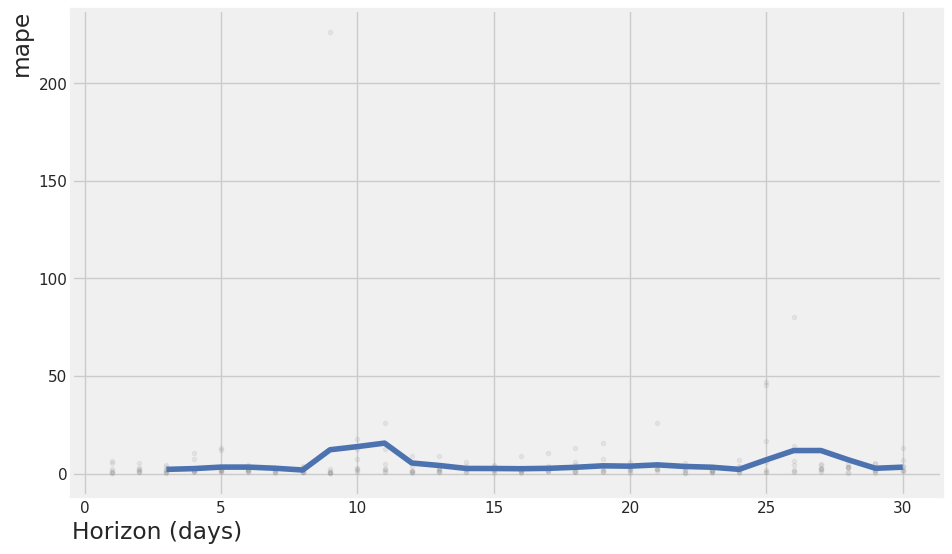

In [293]:
# plot mape performance
plot_cross_validation_metric(df_cv, metric='mape');

### **H2. ..**

### **H3. ..**

### **H4. ..**

### **H5. ..**

## 5.5 - Data Space Analysis

**Initial inspection on dimensionality reduction potential**

### PCA

In [ ]:
# No need so far

### UMAP

In [ ]:
# No need so far

### t-SNE

In [ ]:
# No need so far

### PHATE

In [ ]:
# No need so far

### KMeans Embedding

In [ ]:
# No need so far

### Tree-Base Embedding

In [ ]:
# No need so far

# **6 - DATA PREPARATION**

## 6.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
xxxxxxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
# create a restore point for the previous section dataframe
df_prep = df_eda.copy()

# check dataframe
check_dataframe( df_prep )

## 6.2 - Remove variables that won't be available in the production environment

*Remove variables that model can use on production to make predictions*

In [ ]:
# TO-DO

## 6.3 - Train-Validation-Test split

*Split dataframe into training, validation and test dataset*

In [ ]:
# TO-DO

## 6.4 - Scale numeric features

*Scale numeric feature to make modelling "easier" for ML models*

### 6.4.1 - Standard Scaler

In [ ]:
# TO-DO

### 6.4.2 - Min-Max Scaler

In [ ]:
# TO-DO

### 6.4.3 - Robust Scaler

In [ ]:
# TO-DO

### 6.4.4 - Discretization

In [ ]:
# TO-DO

## 6.5 - Encode categorical features

*Encode categorical feature to make modelling possible for ML models*

### 6.5.1 - One-Hot Encodingm

In [ ]:
# TO-DO

### 6.5.2 - Ordinal Encoding

In [ ]:
# TO-DO

### 6.5.3 - Target Encoding

In [ ]:
# TO-DO

## 6.6 - Response variable transformation

*Transform target variable (e.g. log, sqrt, etc) to make modelling "easier" for ML models*

In [ ]:
# TO-DO

## 6.7 - Cyclic variables transformation

*Transform cyclic variables (e.g. days of week, months in year, etc) with a sin and cos functions*

In [ ]:
# TO-DO

## 6.8 - Double-check preparation

*Double-check the prepared dataset to make sure it is as expected*

In [ ]:
# TO-DO

# **7 - FEATURE SELECTION**

## 7.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_f_selection = df_prep.copy()

# check dataframe
check_dataframe( df_f_selection )

## 7.2 - Logist regression coefficients

In [ ]:
# TO-DO

## 7.3 - Random forest feature importance

In [ ]:
# TO-DO

## 7.4 - Boruta algorithm

In [ ]:
# TO-DO

## 7.5 - Mutual information

In [ ]:
# TO-DO

# **8 - ML MODEL TRAINING**

## 8.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_train = df_f_selection.copy()

# check dataframe
check_dataframe( df_train )

## 8.2 - Metrics

*Define the metric of success and the health metrics*

In [ ]:
# TO-DO

## 8.3 - Baseline model

*Check the performance metrics with a dummy model to get the baseline metric*

In [ ]:
# TO-DO

## 8.4 - ML models

*Get performance metrics of ML model with cross-validation*

In [ ]:
# TO-DO

## 8.5 - Final modelling comparison

*Compare all models and decide what one is the best (and will be fine-tuned)*

In [ ]:
# TO-DO

# **9 - HYPERPARAMETER TUNNING**

## 9.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_tune = df_train.copy()

# check dataframe
check_dataframe( df_tune )

## 9.2 - Hypertune the best ML model

*Check the best hyperparams for the best ML model*

### 9.2.1 - Grid Search

In [ ]:
# TO-DO

### 9.2.2 - Random Search

In [ ]:
# TO-DO

### 9.2.3 - Bayesian Search

In [ ]:
# TO-DO

## 9.3 - Define best hyperparameters

*Explicitly define best hyper parameters*

In [ ]:
# TO-DO

# **10 - PERFORMANCE EVALUATION AND INTERPRETATION**

## 10.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_perform = df_tune.copy()

# check dataframe
check_dataframe( df_perform )

## 10.2 - Training Performance

*Get final model performance on training data*

In [ ]:
# TO-DO

## 10.3 - Generalization performance

### 10.3.1 - Final model training

*Get final model performance on validation data*

In [ ]:
# TO-DO

### 10.3.2 - Error analysis

*Perform error analysis on final model to make sure it is ready for production*

In [ ]:
# TO-DO

## 10.4 - Define prodution model

*Train ML on "training + validation" data*

In [ ]:
# TO-DO

## 10.5 - Testing performance

*Get production model performance on testing data*

In [ ]:
# TO-DO

## 10.6 - Business performance

*Translate testing performance into business results*

In [ ]:
# TO-DO

# **11 - DEPLOYMENT**

![Deployment architecture](../img/....jpg)

## 11.1 - API creation

*Code to create API for ML predictions*

In [ ]:
# TO-DO

## 11.2 - Docker container

*Code to create a Docker container and deploy ML model*

In [ ]:
# TO-DO